# **📦 Import Library**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# **📂 Load & Bersihkan Dataset**

In [2]:
file_path = "transjakarta.csv"
df = pd.read_csv(file_path)

In [3]:
df = df.dropna() #buat mastiin gaada data yg hilang

# **📊 Agregasi Data**

In [4]:
df_total = df.groupby('Koridor')['Jumlah_Pelanggan'].sum().reset_index() #agregasi data berdasarkan koridor dan jumlah total pengunjung dalam setahun

# **🧹 Standardisasi Fitur**

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_total[['Jumlah_Pelanggan']]) #standarisasi data

# **🔍 Cari Jumlah Cluster Optimal (Silhouette Score)**

In [6]:
silhouette_scores = []
cluster_range = range(2, 10) #coba dulu dari 2 sampai 9

In [7]:
for n_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)

In [8]:
optimal_clusters = cluster_range[np.argmax(silhouette_scores)] #nah ini nentuin cluster dgn skor tertinggi

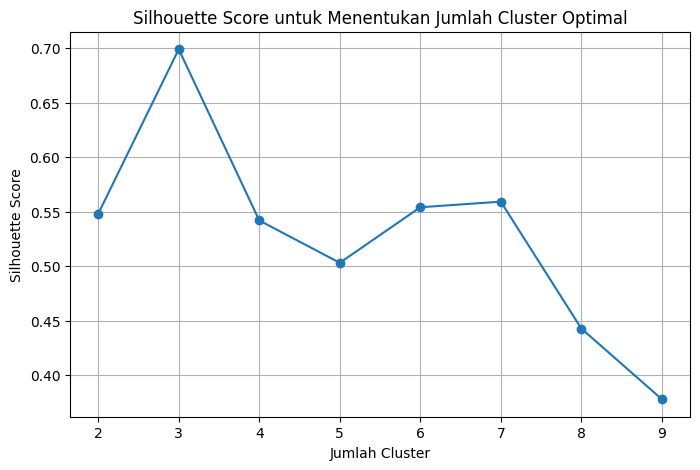

In [9]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# **📌 Clustering Final**


In [10]:
clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
clusters = clustering.fit_predict(scaled_data) #ini proses c;ustering dgn jumlah cluster yg optimal tdi
df_total['Cluster'] = clusters

In [11]:
print(df_total[['Koridor', 'Jumlah_Pelanggan', 'Cluster']]) 

                                          Koridor  Jumlah_Pelanggan  Cluster
0                                   BLOK M - KOTA          20861793        2
1                   CAWANG SUTOYO - TANJUNG PRIOK           8261792        1
2                           CBD CILEDUG - TENDEAN          13067673        1
3                          KALIDERES - PASAR BARU          10570644        1
4                          KAMPUNG MELAYU - ANCOL          10355845        1
5               KAMPUNG RAMBUTAN - KAMPUNG MELAYU           9399044        1
6                           LEBAK BULUS - HARMONI          12285028        1
7                            PINANG RANTI - PLUIT          19480944        2
8                    PULO GEBANG - KAMPUNG MELAYU           2834924        0
9                          PULOGADUNG 1 - HARMONI          11222022        1
10                    PULOGADUNG 2 - DUKUH ATAS 2           6146351        0
11                         RAGUNAN - DUKUH ATAS 2          10449294        1

# **🔁 Eksperimen Linkage Berbeda**

In [12]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['single', 'complete', 'average', 'ward']  # centroid & median gak didukung sklearn

for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=method)
    clusters = clustering.fit_predict(scaled_data)
    df_total[f'Cluster_{method}'] = clusters


# **🌿 Dendrogram untuk Tiap Linkage**

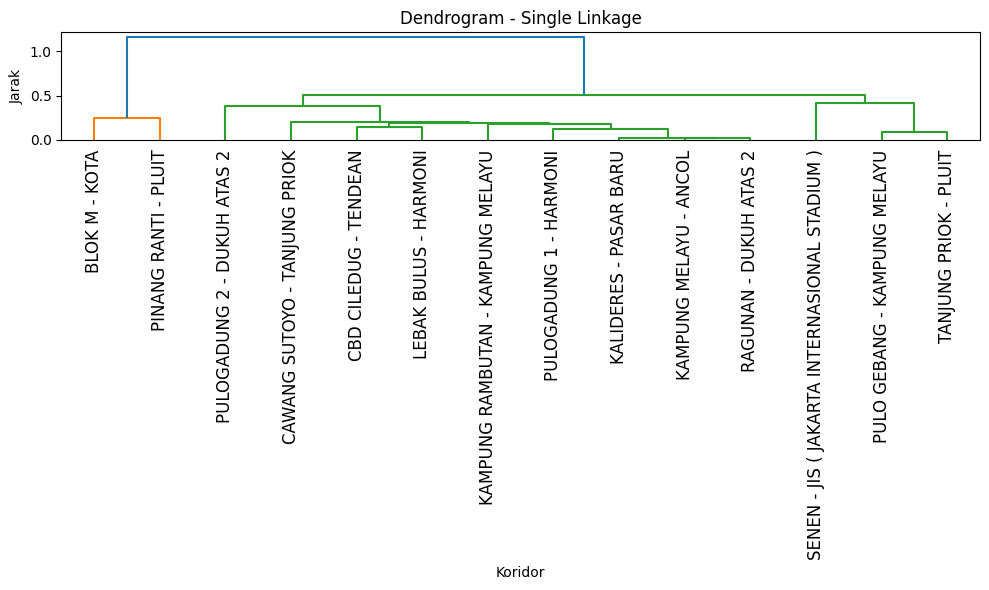

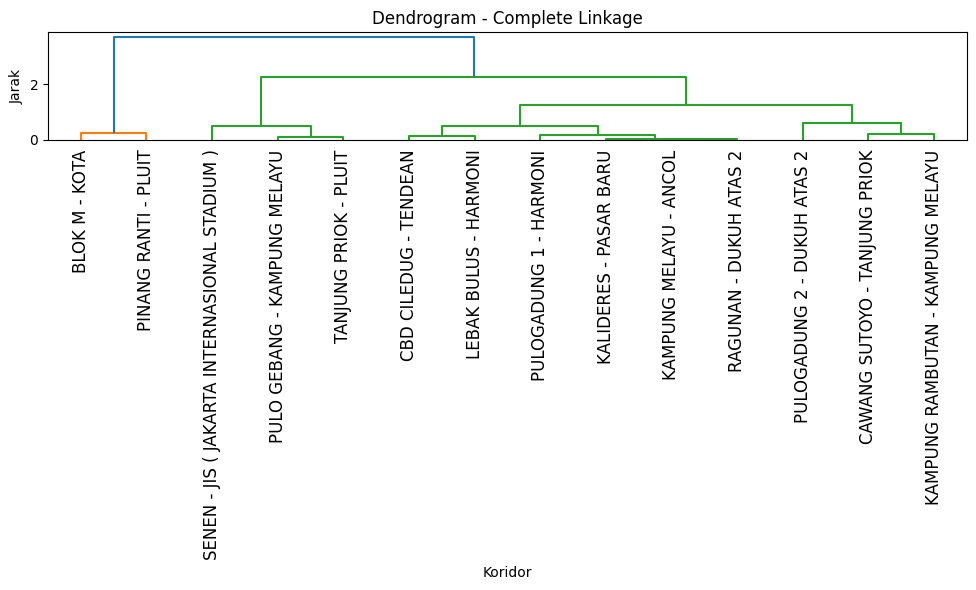

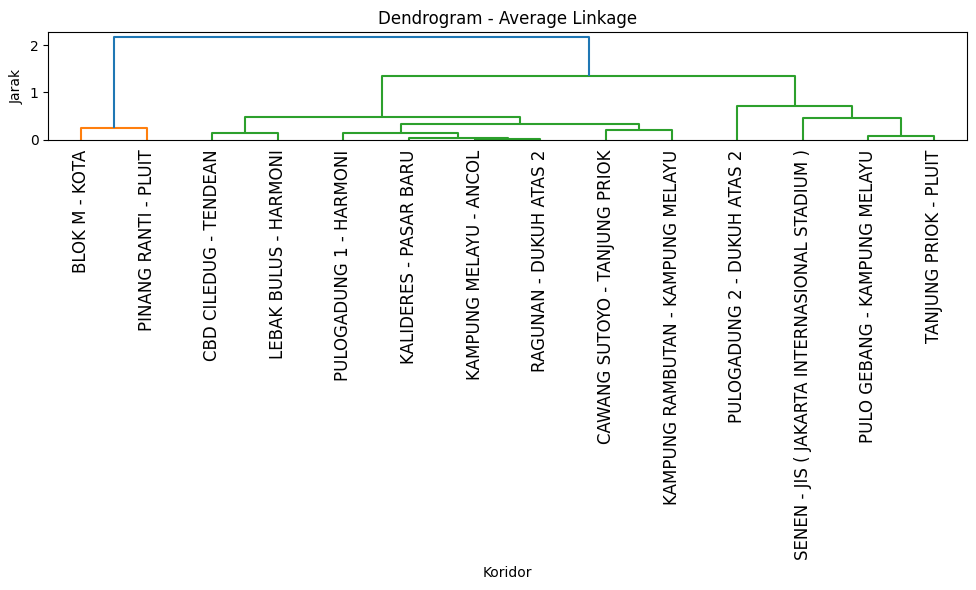

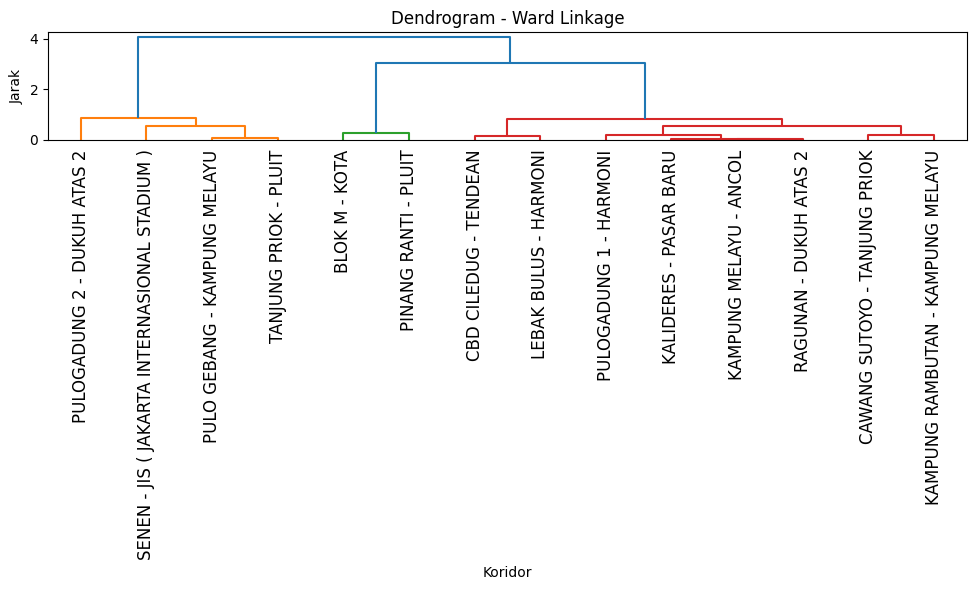

In [13]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Daftar metode linkage
methods = ['single', 'complete', 'average', 'ward']

# Loop setiap metode dan tampilkan dendrogram satu per satu
for method in methods:
    plt.figure(figsize=(10, 6))
    Z = sch.linkage(scaled_data, method=method)
    sch.dendrogram(Z, labels=df_total['Koridor'].values)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Koridor')
    plt.ylabel('Jarak')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# **📈 Evaluasi Silhouette Score per Linkage**

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

methods = ['single', 'complete', 'average', 'ward']
optimal_clusters = 3  # atau berapa pun kamu mau coba

for method in methods:
    model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=method)
    clusters = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, clusters)
    print(f'{method:<8}: Silhouette Score = {score:.4f}')


single  : Silhouette Score = 0.6846
complete: Silhouette Score = 0.6846
average : Silhouette Score = 0.6989
ward    : Silhouette Score = 0.6989


# **🌿 Dendrogram Akhir (Ward Linkage)**

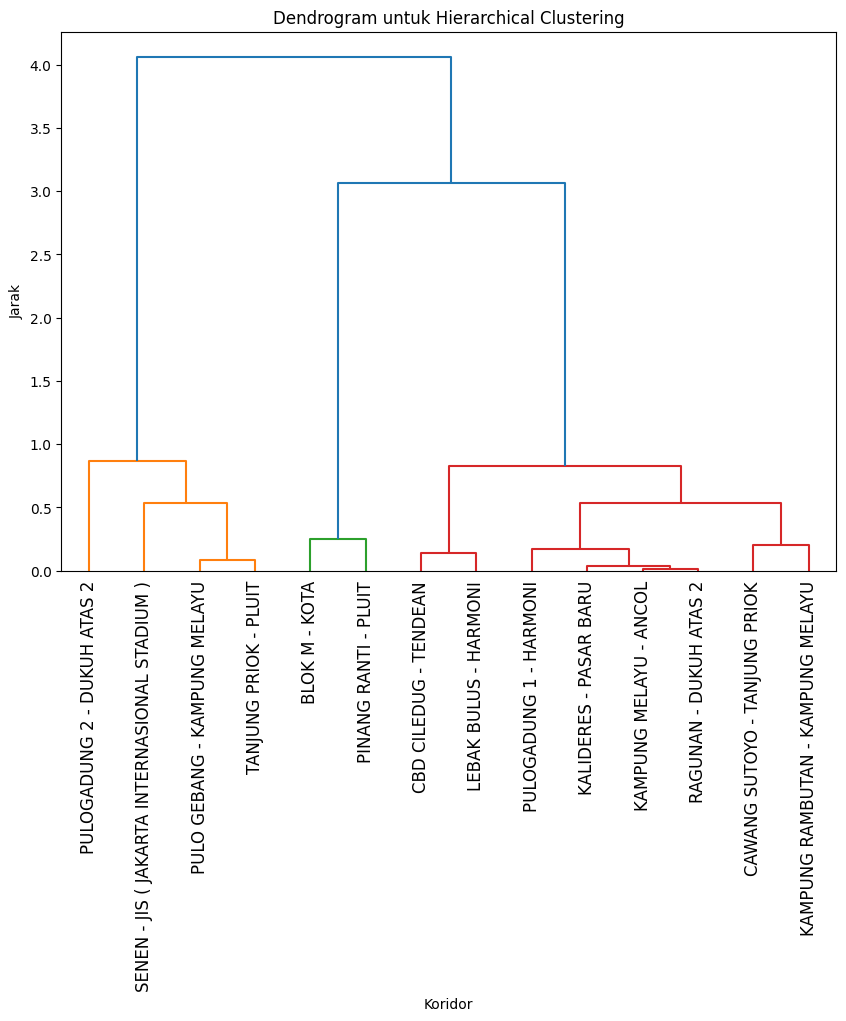

In [15]:
Z = sch.linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z, labels=df_total['Koridor'].values)
plt.title('Dendrogram untuk Hierarchical Clustering')
plt.xlabel('Koridor')
plt.ylabel('Jarak')
plt.xticks(rotation=90)
plt.show() #dendogram

# **📈 Visualisasi Hasil Clustering (Scatter Plot)**

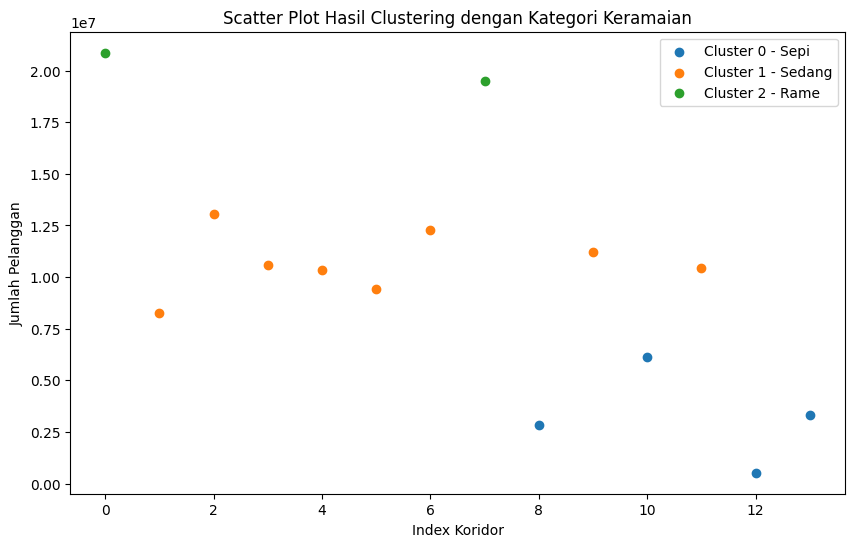

In [19]:
# Hitung rata-rata pelanggan tiap cluster
cluster_means = df_total.groupby('Cluster')['Jumlah_Pelanggan'].mean().sort_values()
kategori_keramaian = {}

# Beri label kategori (Sepi, Sedang, Rame) berdasarkan urutan rata-rata
labels_kategori = ['Sepi', 'Sedang', 'Rame']  # Kalau jumlah cluster = 3
for i, cluster_id in enumerate(cluster_means.index):
    kategori_keramaian[cluster_id] = labels_kategori[i]

# Plot dengan label kategori
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = df_total[df_total['Cluster'] == cluster]
    label_kategori = kategori_keramaian[cluster]
    plt.scatter(
        cluster_data.index,
        cluster_data['Jumlah_Pelanggan'],
        label=f'Cluster {cluster} - {label_kategori}'
    )

plt.title('Scatter Plot Hasil Clustering dengan Kategori Keramaian')
plt.xlabel('Index Koridor')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show()


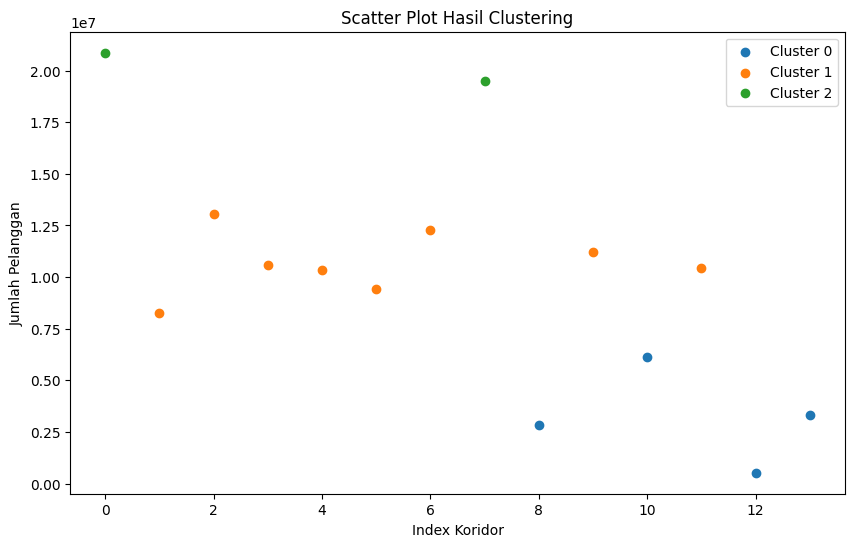

In [18]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        df_total[df_total['Cluster'] == cluster].index, 
        df_total[df_total['Cluster'] == cluster]['Jumlah_Pelanggan'], 
        label=f'Cluster {cluster}'
    )

plt.title('Scatter Plot Hasil Clustering')
plt.xlabel('Index Koridor')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show() #scatter plot